# Telescope design

How do we design a telescope that magnifies a deflected laser beam to illuminate an objective?

In [36]:
from matplotlib import pyplot as plt

plt.style.use('bodo')

colors = plt.get_cmap('tab20').colors

Given focal length $f_1$ of the first telescope lens, focal length $f_2$ of the second telescope lens and effective focal length $f_o$ of the objective, the ABCD transfer matrix of this system reads,
$$
\begin{pmatrix}
-f_2/f_1 & -f_of_1/f_2 \\
f_2/(f_of_1)& 0
\end{pmatrix},
$$
by introducting the magnification factor $M=-f_2/f_1$ we can rewrite the matrix as,
$$
\begin{pmatrix}
M & -f_o/M \\
M/f_o & 0
\end{pmatrix}.
$$

In [1]:
from optics.geometrical import ThinLens, Propagation

def system_abcd(f1, f2, fo):
    P1 = Propagation(f1).abcd()
    L1 = ThinLens(f1).abcd()
    
    P2 = Propagation(f2).abcd()
    L2 = ThinLens(f2).abcd()
    
    Po = Propagation(fo).abcd()
    Lo = ThinLens(fo).abcd()
    
    return Lo * Po * P2 * L2 * P2 * P1 * L1 * P1

For a geometrical ray with distance $y=0$ from the optical axis and angle $\theta$ with the optical axis, we can read off the position offset at the objective,
$$
y^\prime
=
-\frac{f_0}{M}\theta.
$$

In [50]:
def magnification(f1, f2):
    return - f2 / f1

def offset(f, M, theta):
    return f * theta / M

We consider two deflector types,

* ecousto-optic

$$
\begin{align}
    a_a= 5\text{ mm}, && \theta_a=8\text{ mrad},
\end{align}
$$

* electro-optic

$$
\begin{align}
    a_e=0.5\text{ mm}, && \theta_e=20\text{ mrad},
\end{align}
$$

wherein $a$ denotes the aperture radius and $\theta$ the maximum deflection angle of the respective deflector type. We fix the effective focal length of the objective to
$$f_o=25\text{ mm},$$
and assume an aperture radius of the objective of
$$a_o=20\text{ mm}.$$

In [19]:
# numerical aperture of objective
NA = 0.8

# effective focal length of objective
fo = 25e-3

# aperture radius of objective
ao = 20e-3

# maximum aperture radius of acousto-optic and electro-optic deflector
aa = 5.0e-3
ae = 0.5e-3

# maximum deflection angle of acousto-optic and electro-optic deflector
thetaa = 8e-3
thetae = 20e-3

# laser wavelength
lamda = 532e-9

The spot size in the focal plane can be estimated by,
$$
s(w_0,a_o)
=
\frac{0.97\lambda a_o}{2 w_0 \mathit{NA}}
\sqrt{\frac{e}{1-\exp(-a_o^2/w_0^2)}-1}.
$$

In [35]:
def spot_size(w0):
    T = w0 / ao
    
    return 0.97 * lamda * np.sqrt(np.exp(1)/(1 - np.exp(-1 / T**2)) - 1) / (2 * T * NA)

We need to specify a value range for the magnification factor $M$. From the other notebook we know that it is desirable to illuminate the complete lens surface in order to achieve a small focal spot size.

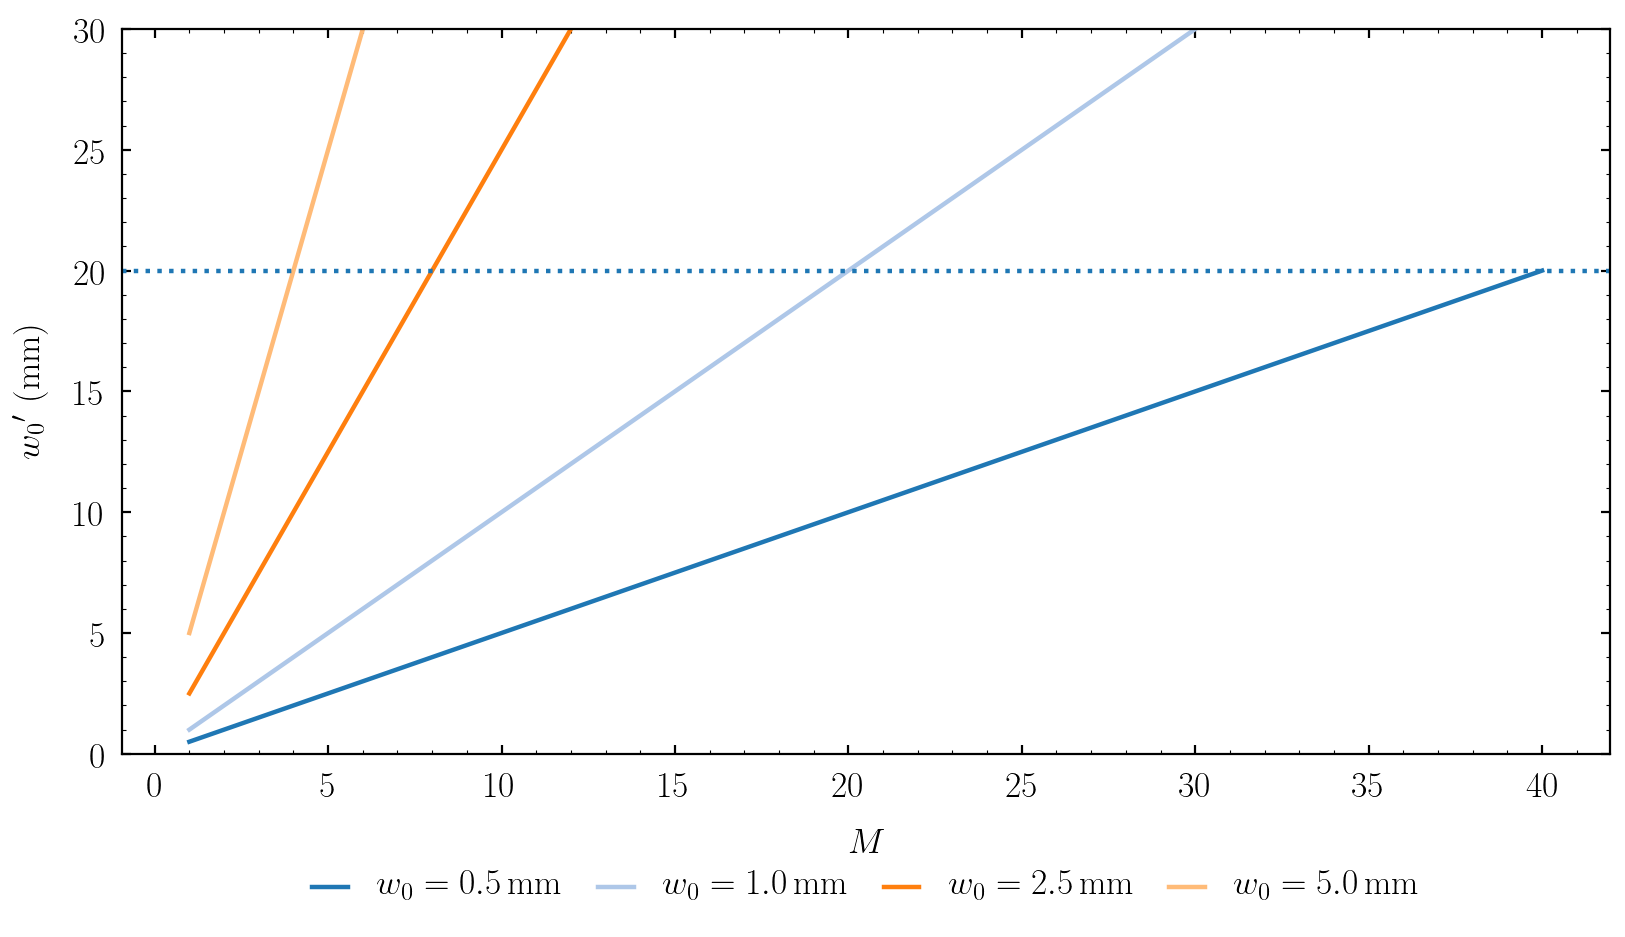

In [49]:
M = np.linspace(1, 40)

plt.figure(figsize=(12, 6))
plt.xlabel(r'$M$')
plt.ylabel(r'${w_0}^\prime$ (\si{\milli\meter})')
plt.plot(M, M * 0.5, label=r'$w_0=\SI{0.5}{\milli\meter}$', color=colors[0])
plt.plot(M, M * 1.0, label=r'$w_0=\SI{1.0}{\milli\meter}$', color=colors[1])
plt.plot(M, M * 2.5, label=r'$w_0=\SI{2.5}{\milli\meter}$', color=colors[2])
plt.plot(M, M * 5.0, label=r'$w_0=\SI{5.0}{\milli\meter}$', color=colors[3])
plt.axhline(20, linestyle='dotted')
plt.ylim(0, 30)
plt.legend(loc='upper center', bbox_to_anchor=(.5, -0.12), ncol=4)
plt.show()

In order to illuminate the complete objective surface we need a magnification of $M=40$ for the electro-optic deflector aperture. For the acousto-optic deflector we can assume a beam waist in between the orange lines, thus we would require a magnification of $M=10$ for the acousto-optic deflector to illuminate the complete objective surface.

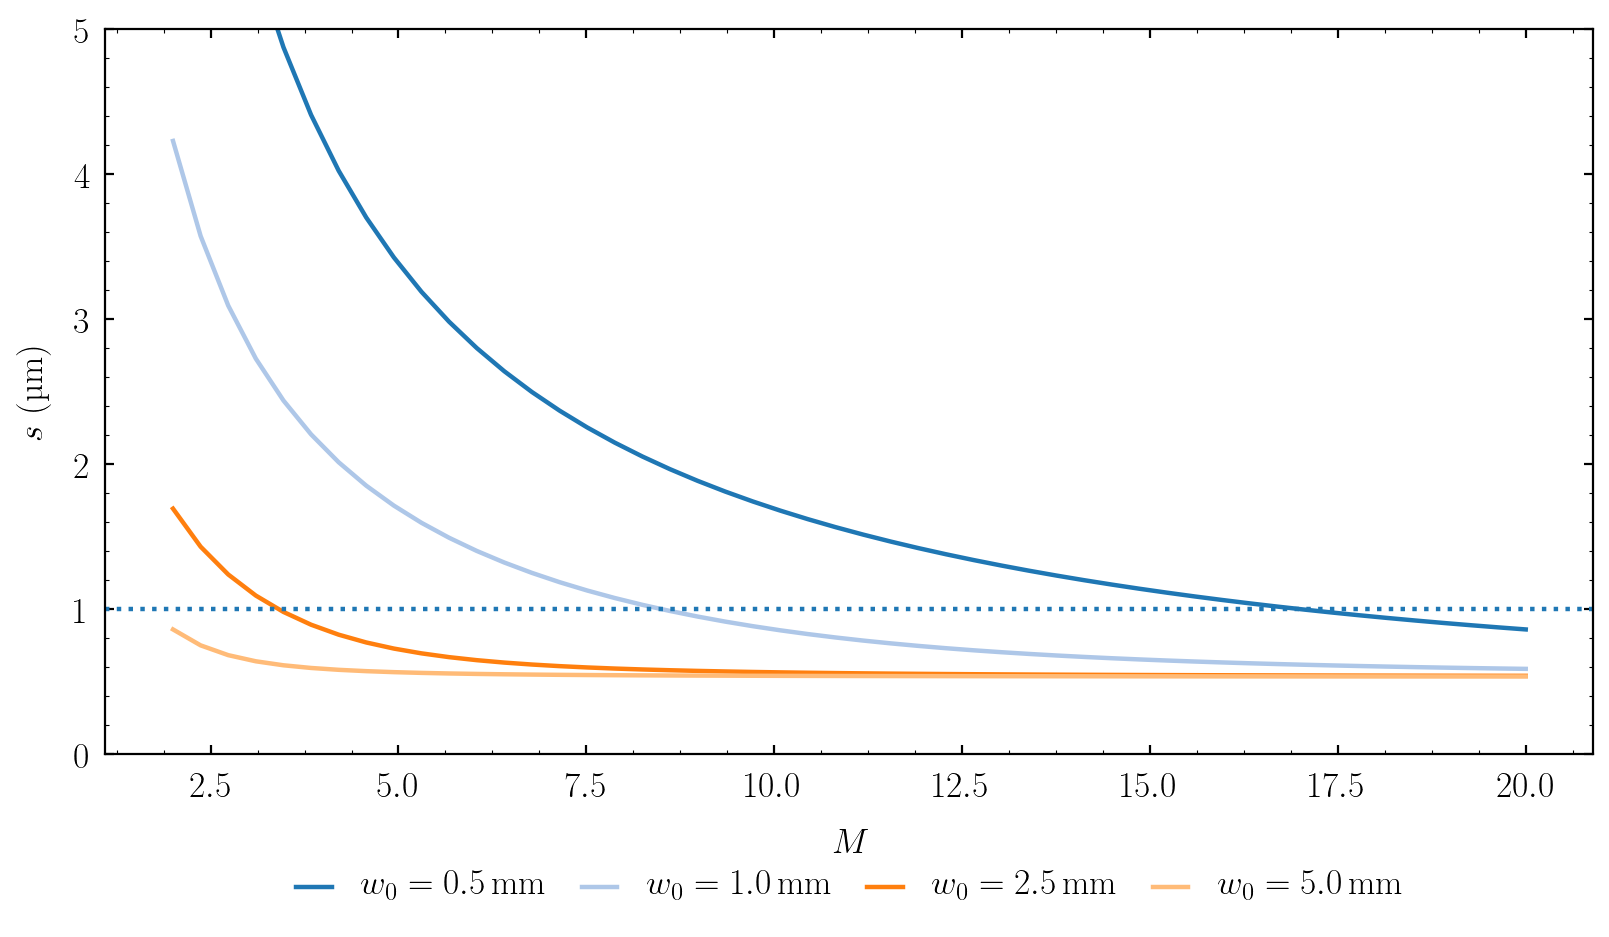

In [48]:
M = np.linspace(2, 20)

plt.figure(figsize=(12, 6))

plt.xlabel(r'$M$')
plt.ylabel(r'$s$ (\si{\micro\meter})')
plt.plot(M, spot_size(M * 0.5e-3) / 1e-6, label=r'$w_0=\SI{0.5}{\milli\meter}$', color=colors[0])
plt.plot(M, spot_size(M * 1.0e-3) / 1e-6, label=r'$w_0=\SI{1.0}{\milli\meter}$', color=colors[1])
plt.plot(M, spot_size(M * 2.5e-3) / 1e-6, label=r'$w_0=\SI{2.5}{\milli\meter}$', color=colors[2])
plt.plot(M, spot_size(M * 5.0e-3) / 1e-6, label=r'$w_0=\SI{5.0}{\milli\meter}$', color=colors[3])
plt.axhline(1, linestyle='dotted')
plt.ylim(0, 5)
plt.legend(loc='upper center', bbox_to_anchor=(.5, -0.12), ncol=4)
plt.show()

The focus spot should be about $1\mu m$. This would require a magnification of $M=17$ for the electro-optic defelector and $M=3$ for the acousto-optic deflector.

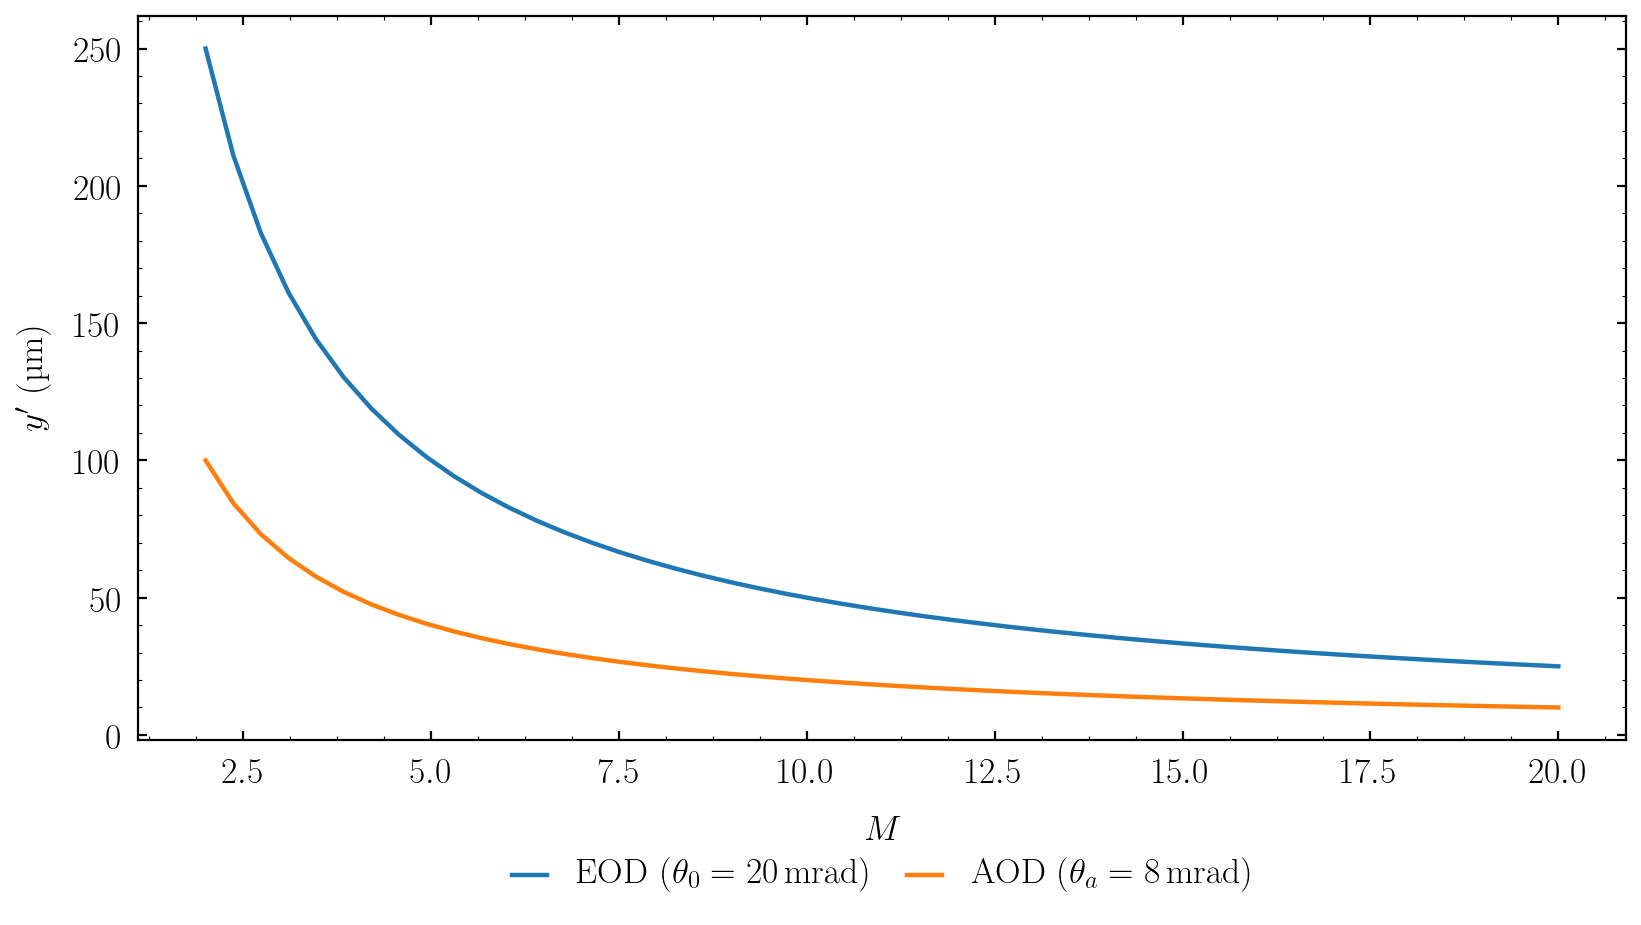

In [57]:
M = np.linspace(2, 20)

plt.figure(figsize=(12, 6))

plt.xlabel(r'$M$')
plt.ylabel(r'$y^\prime$ (\si{\micro\meter})')
plt.plot(M, offset(fo, M, thetae) / 1e-6, label=r'EOD ($\theta_0=\SI{20}{\milli\radian}$)', color=colors[0])
plt.plot(M, offset(fo, M, thetaa) / 1e-6, label=r'AOD ($\theta_a=\SI{8}{\milli\radian}$)', color=colors[2])
#plt.ylim(0, 400)
plt.legend(loc='upper center', bbox_to_anchor=(.5, -0.12), ncol=4)
plt.show()